In [1]:
import anndata as ad
import scanpy as sc
import episcanpy as epi
import pandas as pd

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=500,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

/home/icb/chaichoompu/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#!pip install git+https://github.com/colomemaria/epiScanpy
#!pip install python-igraph
#!pip install louvain

In [3]:
cistopic_pca_file = "cisTopicObject_feature_matrices_seurat_80topics_maximum.csv"

In [4]:
original_adata_file = "ATAC_mtx_cus_whole_atlas.h5ad"

In [5]:
adata = ad.read(original_adata_file)
adata

AnnData object with n_obs × n_vars = 81173 × 385236
    obs: 'original_file_name', 'cell_name', 'sample', 'barcode', 'tissue', 'mouse_ID', 'cell_label'

In [6]:
csv = pd.read_csv(cistopic_pca_file, index_col=0)

In [7]:
csv

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,...,Topic71,Topic72,Topic73,Topic74,Topic75,Topic76,Topic77,Topic78,Topic79,Topic80
PreFrontalCortex_62216.ATTACTCGGATTCTTGAATCCTTATAGATAATCTTA.header.bam,0.001184,0.001435,0.135126,0.002036,0.008754,0.035321,0.001635,0.001635,0.005094,0.003390,...,0.145603,0.110313,0.000783,0.004443,0.009155,0.003390,0.000182,0.001034,0.180842,0.001936
Testes_62016.TCCGGAGAGGTTATCGAACCTCCGACGGCCTATCCT.header.bam,0.000202,0.004055,0.003558,0.000451,0.008032,0.005671,0.004179,0.003558,0.011761,0.084095,...,0.005298,0.002812,0.006913,0.007411,0.046685,0.005173,0.002688,0.015489,0.015986,0.003558
Liver_62016.CGCTCATTCTAATTGCGAGATTACCGGACAGGACGT.header.bam,0.004430,0.001557,0.000599,0.002514,0.003472,0.014966,0.100216,0.001557,0.002514,0.008261,...,0.001557,0.006346,0.000599,0.010177,0.000599,0.000599,0.007304,0.003472,0.001557,0.006346
Liver_62016.ATTCAGAAGCGTTCCGTTATTCGGAAGTAGGCGAAG.header.bam,0.000783,0.013315,0.003289,0.000783,0.004543,0.104793,0.008302,0.000783,0.004543,0.003289,...,0.000783,0.002036,0.000783,0.004543,0.000783,0.000783,0.000783,0.008302,0.000783,0.000783
Testes_62016.GAATTCGTCCGCTAAGAGTTGAGAGAGTGGCTCTGA.header.bam,0.012817,0.002665,0.005711,0.025000,0.005711,0.007741,0.023985,0.003680,0.003680,0.005711,...,0.013832,0.015863,0.017893,0.007741,0.022970,0.000635,0.000635,0.079822,0.006726,0.000635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lung2_62216.TCCGCGAAGTAGGATAAGACTGAGCGACCAGGACGT.header.bam,0.000947,0.005492,0.002462,0.003977,0.000947,0.002462,0.000947,0.013068,0.003977,0.000947,...,0.000947,0.003977,0.002462,0.031250,0.003977,0.005492,0.002462,0.052462,0.000947,0.000947
Thymus_62016.TCCGCGAAGACTGGACCACAATGAGTCCCAGGACGT.header.bam,0.000290,0.012185,0.000603,0.010933,0.006488,0.004046,0.010495,0.001917,0.000603,0.001229,...,0.000102,0.000039,0.000227,0.003921,0.000415,0.000665,0.000352,0.063838,0.002982,0.002731
Cerebellum_62216.TCTCGCGCATAAGGACTCGTAGACCTGGGGCTCTGA.header.bam,0.003770,0.002430,0.000419,0.001089,0.014494,0.001089,0.001089,0.100955,0.020526,0.025888,...,0.011143,0.000419,0.010473,0.000419,0.035271,0.003770,0.003770,0.005111,0.027229,0.002430
Thymus_62016.TCCGCGAAAGTCCGCTGCCAATGAGTCCCAGGACGT.header.bam,0.000897,0.000897,0.000897,0.000897,0.000897,0.005201,0.000897,0.002331,0.002331,0.006636,...,0.000897,0.000897,0.000897,0.019548,0.000897,0.006636,0.002331,0.072633,0.002331,0.000897


In [8]:
adata.obsm['X_lda'] = csv.to_numpy()

In [9]:
sc.pp.neighbors(adata, use_rep='X_lda')
sc.tl.umap(adata)

The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../../home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../../home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

The keyword argum

In [16]:
epi.tl.getNClusters(adata, n_cluster=13)

step 0
got 39 at resolution 1.5
step 1
got 26 at resolution 0.75
step 2
got 22 at resolution 0.375
step 3
got 13 at resolution 0.0703125


(0.0703125, AnnData object with n_obs × n_vars = 81173 × 385236
     obs: 'original_file_name', 'cell_name', 'sample', 'barcode', 'tissue', 'mouse_ID', 'cell_label', 'louvain'
     uns: 'neighbors', 'umap', 'louvain', 'cell_label_colors', 'louvain_colors'
     obsm: 'X_lda', 'X_umap'
     obsp: 'distances', 'connectivities')

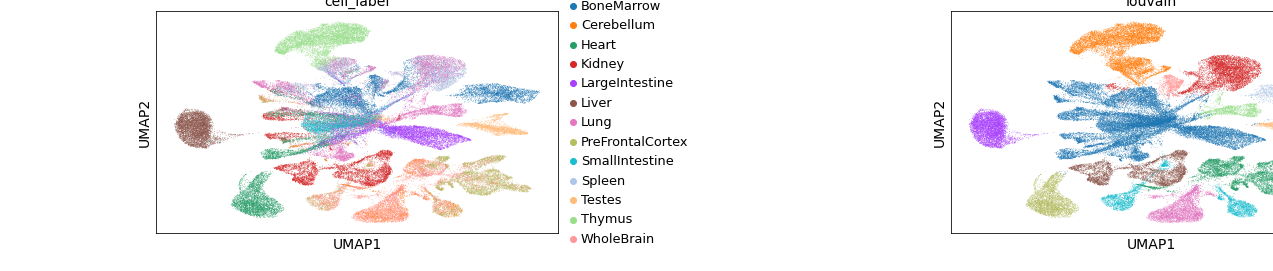

In [22]:
sc.pl.umap(adata, color=['cell_label', 'louvain'], save='cistopic_umap_80topics_maximum.pdf', wspace=0.8)

In [18]:
#ARI of Louvain for EpiScanpy is 0.42431394419953866
epi.tl.ARI(adata, 'louvain', 'cell_label')

0.32049038001331814

In [19]:
epi.tl.AMI(adata, 'louvain', 'cell_label')

0.5743740797773442

In [20]:
epi.tl.homogeneity(adata, 'louvain', 'cell_label')

0.6487396380136534